In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [3]:
data = pd.read_csv("HotelCancelation.csv")

In [4]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
print(data.head())
print(data.shape)

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [6]:
data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
data.isnull().values.any()

False

In [17]:
import holidays
from workalendar.europe import UnitedKingdom

In [18]:
data_new = data
cols = ["arrival_year","arrival_month","arrival_date"]
data_new = data_new.sort_values(by = cols)
data_new['date_of_arrival'] = data_new[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [19]:
print("Number of Rows containing invalid dates:",data_new["date_of_arrival"].str.contains("2018-2-29", na=False).sum())
data_new.drop(data_new[(data_new['date_of_arrival'] == "2018-2-29")].index, inplace=True)
data_new

Number of Rows containing invalid dates: 37


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [20]:
data_new

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival
583,INN00584,1,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1
695,INN00696,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
769,INN00770,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1132,INN01133,2,0,0,2,Meal Plan 2,0,Room_Type 1,257,2017,7,1,Online,0,0,0,101.50,0,Canceled,2017-7-1
1775,INN01776,1,0,0,4,Meal Plan 1,0,Room_Type 1,65,2017,7,1,Online,0,0,0,68.00,1,Canceled,2017-7-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,2,2,0,1,Meal Plan 1,0,Room_Type 6,260,2018,12,31,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31
32894,INN32895,2,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31
33442,INN33443,2,1,1,1,Meal Plan 1,0,Room_Type 1,269,2018,12,31,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31
33902,INN33903,3,0,2,1,Meal Plan 1,0,Room_Type 1,103,2018,12,31,Offline,0,0,0,205.00,0,Canceled,2018-12-31


In [21]:
sub_data_new = data_new.loc[data_new["booking_status"].str.contains("Not_Canceled"),:]

In [22]:
sub_data_new.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'date_of_arrival'],
      dtype='object')

In [23]:
sub_data_new.drop(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time','date_of_arrival',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests','booking_status'], axis=1, inplace=True)

In [24]:
sub_data_new

,arrival_year,arrival_month
583,2017,7
2538,2017,7
5884,2017,7
8290,2017,7
8762,2017,7
...,...,...
28291,2018,12
29690,2018,12
32027,2018,12
32894,2018,12


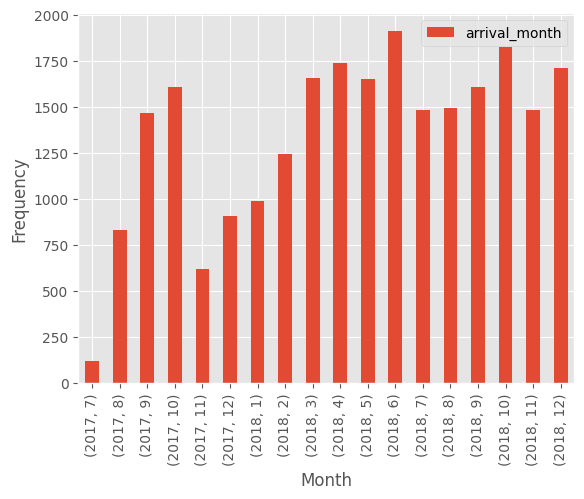

In [43]:
sub_data_new.groupby([sub_data_new.arrival_year, sub_data_new[data_new["booking_status"] == "Not_Canceled"].arrival_month]).count().plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.show()

In [27]:
data_new["no_of_guests"] = data_new["no_of_adults"] + 0.5*data_new["no_of_children"]
data_new["total_no_of_nights"] = data_new["no_of_weekend_nights"] + data_new["no_of_week_nights"]
data_new = data_new.drop(["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","arrival_year","arrival_month","arrival_date"],axis=1)
data_new

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,no_of_guests,total_no_of_nights
583,INN00584,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1,1.0,2
695,INN00696,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2
769,INN00770,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2
1132,INN01133,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2
1775,INN01776,Meal Plan 1,0,Room_Type 1,65,Online,0,0,0,68.00,1,Canceled,2017-7-1,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,Meal Plan 1,0,Room_Type 6,260,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31,3.0,1
32894,INN32895,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31,2.0,3
33442,INN33443,Meal Plan 1,0,Room_Type 1,269,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31,2.5,2
33902,INN33903,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,205.00,0,Canceled,2018-12-31,3.0,3


In [28]:
holiday_list = []
for holiday in holidays.UnitedKingdom(years=[2017, 2018]).items():
    holiday_list.append(holiday)

holidays_df = pd.DataFrame(holiday_list, columns=["date", "holiday"])
holidays_df

,date,holiday
0,2017-01-01,New Year's Day
1,2017-01-02,New Year Holiday [Scotland]; New Year's Day (O...
2,2017-01-03,New Year Holiday [Scotland] (Observed)
3,2017-03-17,St. Patrick's Day [Northern Ireland]
4,2017-07-12,Battle of the Boyne [Northern Ireland]
5,2017-08-07,Summer Bank Holiday [Scotland]
6,2017-11-30,St. Andrew's Day [Scotland]
7,2017-12-25,Christmas Day
8,2017-04-14,Good Friday
9,2017-04-17,Easter Monday [England/Wales/Northern Ireland]


In [29]:
uk_holidays = holidays.UnitedKingdom(years=[2017, 2018])
data_new["is_holiday"] = [date in uk_holidays for date in data_new["date_of_arrival"]]
data_new

,Booking_ID,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,date_of_arrival,no_of_guests,total_no_of_nights,is_holiday
583,INN00584,Meal Plan 2,0,Room_Type 1,257,Offline,0,0,0,80.00,0,Not_Canceled,2017-7-1,1.0,2,False
695,INN00696,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2,False
769,INN00770,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2,False
1132,INN01133,Meal Plan 2,0,Room_Type 1,257,Online,0,0,0,101.50,0,Canceled,2017-7-1,2.0,2,False
1775,INN01776,Meal Plan 1,0,Room_Type 1,65,Online,0,0,0,68.00,1,Canceled,2017-7-1,1.0,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32027,INN32028,Meal Plan 1,0,Room_Type 6,260,Online,0,0,0,168.30,0,Not_Canceled,2018-12-31,3.0,1,False
32894,INN32895,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,150.67,0,Not_Canceled,2018-12-31,2.0,3,False
33442,INN33443,Meal Plan 1,0,Room_Type 1,269,Online,0,0,0,105.30,0,Not_Canceled,2018-12-31,2.5,2,False
33902,INN33903,Meal Plan 1,0,Room_Type 1,103,Offline,0,0,0,205.00,0,Canceled,2018-12-31,3.0,3,False


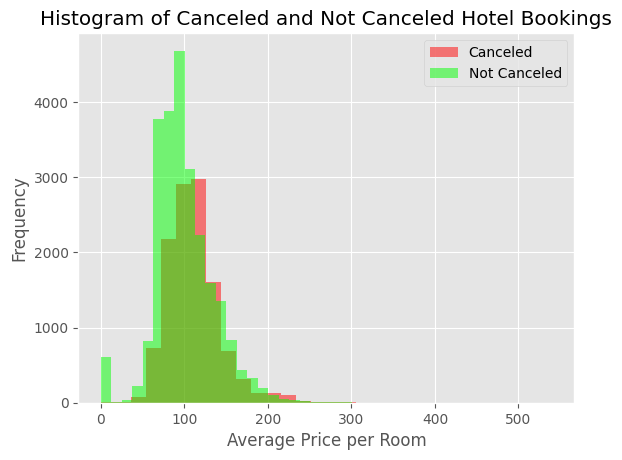

In [30]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].avg_price_per_room,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].avg_price_per_room,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Average Price per Room")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


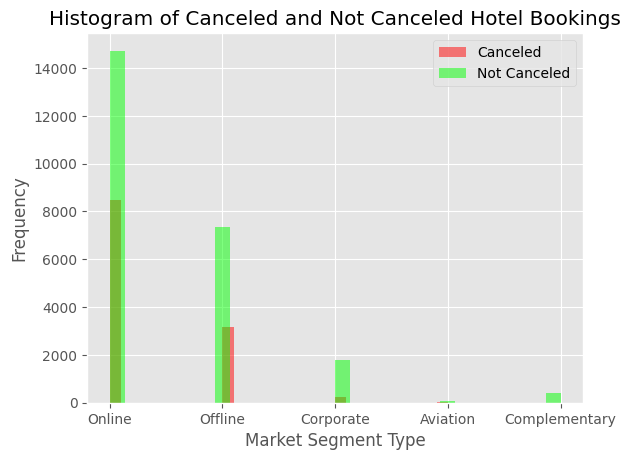

In [31]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].market_segment_type,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].market_segment_type,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Market Segment Type")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

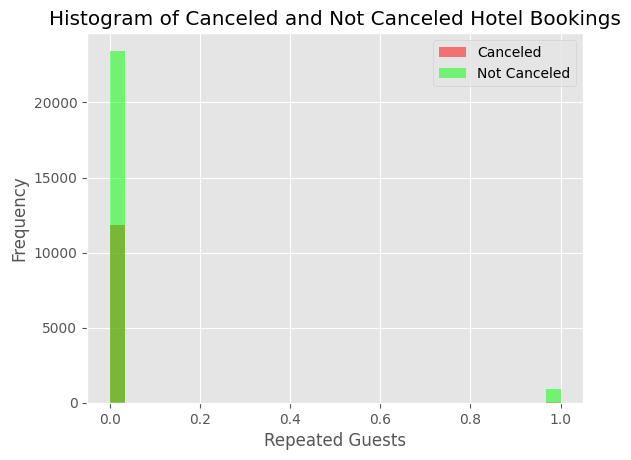

In [32]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

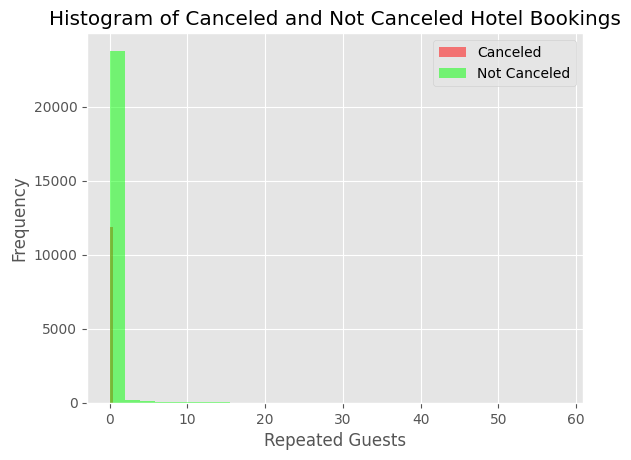

In [33]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].no_of_previous_bookings_not_canceled,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()



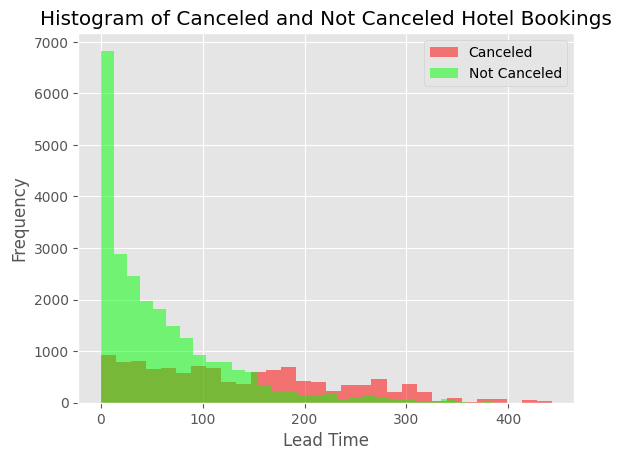

In [34]:
c = plt.hist(data_new[data_new["booking_status"] == "Canceled"].lead_time,bins=30,fc = (1,0,0,0.5),label = "Canceled")
n = plt.hist(data_new[data_new["booking_status"] == "Not_Canceled"].lead_time,bins=30,fc = (0,1,0,0.5),label = "Not Canceled")
plt.legend()
plt.xlabel("Lead Time")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()


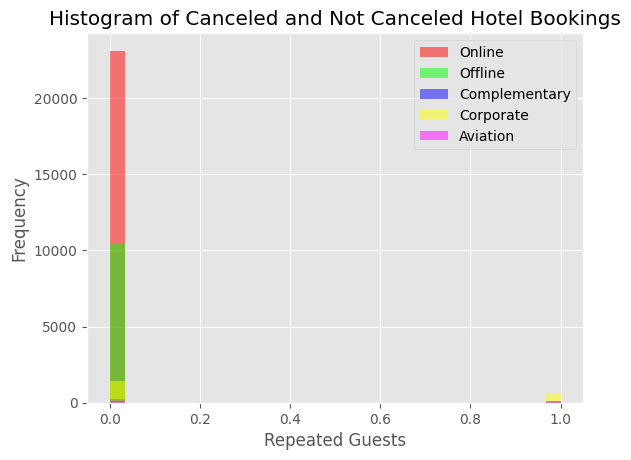

In [35]:
on = plt.hist(data_new[data_new["market_segment_type"] == "Online"].repeated_guest,bins=30,fc = (1,0,0,0.5),label = "Online")
of = plt.hist(data_new[data_new["market_segment_type"] == "Offline"].repeated_guest,bins=30,fc = (0,1,0,0.5),label = "Offline")
comp = plt.hist(data_new[data_new["market_segment_type"] == "Complementary"].repeated_guest,bins=30,fc = (0,0,1,0.5),label = "Complementary")
corp = plt.hist(data_new[data_new["market_segment_type"] == "Corporate"].repeated_guest,bins=30,fc = (1,1,0,0.5),label = "Corporate")
a = plt.hist(data_new[data_new["market_segment_type"] == "Aviation"].repeated_guest,bins=30,fc = (1,0,1,0.5),label = "Aviation")
plt.legend()
plt.xlabel("Repeated Guests")
plt.ylabel("Frequency")
plt.title("Histogram of Canceled and Not Canceled Hotel Bookings")
plt.show()

In [36]:
data_canceled = data_new[data_new["booking_status"] == "Canceled"]
data_not_canceled = data_new[data_new["booking_status"] == "Not_Canceled"]
desc1 = data_canceled.avg_price_per_room.describe()
print(desc1)
Q1 = desc1[4]
Q3 = desc1[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("For Canceled Bookings, anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.avg_price_per_room < lower_bound].avg_price_per_room
print(" Canceled Booking Outliers: ",data_canceled[(data_canceled.avg_price_per_room < lower_bound)|(data_canceled.avg_price_per_room > upper_bound)].avg_price_per_room.values)

count    11878.000000
mean       110.607933
std         32.263124
min          0.000000
25%         89.400000
50%        108.000000
75%        126.397500
max        540.000000
Name: avg_price_per_room, dtype: float64
For Canceled Bookings, anything outside this range is an outlier: ( 33.903750000000024 , 181.89374999999998 )
 Canceled Booking Outliers:  [ 12.     0.   209.5  200.   224.67 224.67 224.67 224.67 224.67 224.67
 206.   224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67
 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67 224.67
 231.    19.15  19.15  19.15  19.15 250.     0.   205.     0.   230.
  12.   193.    12.   195.4   12.   214.6  212.42 189.   182.7  230.
  14.   182.   211.   183.67 185.67 201.95 540.   182.   224.33 254.
 216.   202.3  221.   203.76 189.9  199.4  196.   200.75 196.   203.33
 190.58 228.6  191.5  186.3  201.   191.58 197.    26.35 206.   228.6
 203.5  260.5  197.78 218.96 185.1  198.9  207.9  217.67 198.9  187.85
 198.9  210.

In [37]:
desc2 = data_canceled.lead_time.describe()
print(desc2)
Q1 = desc2[4]
Q3 = desc2[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (",lower_bound,",",upper_bound,")")
data_canceled[data_canceled.lead_time < lower_bound].lead_time
print("Outliers: ",data_canceled[(data_canceled.lead_time < lower_bound)|(data_canceled.lead_time > upper_bound)].lead_time.values)

count    11878.000000
mean       139.266206
std         98.951899
min          0.000000
25%         55.000000
50%        122.000000
75%        205.000000
max        443.000000
Name: lead_time, dtype: float64
Anything outside this range is an outlier: ( -170.0 , 430.0 )
Outliers:  [443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443 443
 443 443 443 443 433 433 433 433 433 433 433 433 433 433 433 433 433 433
 433 433 433 433 433 433]


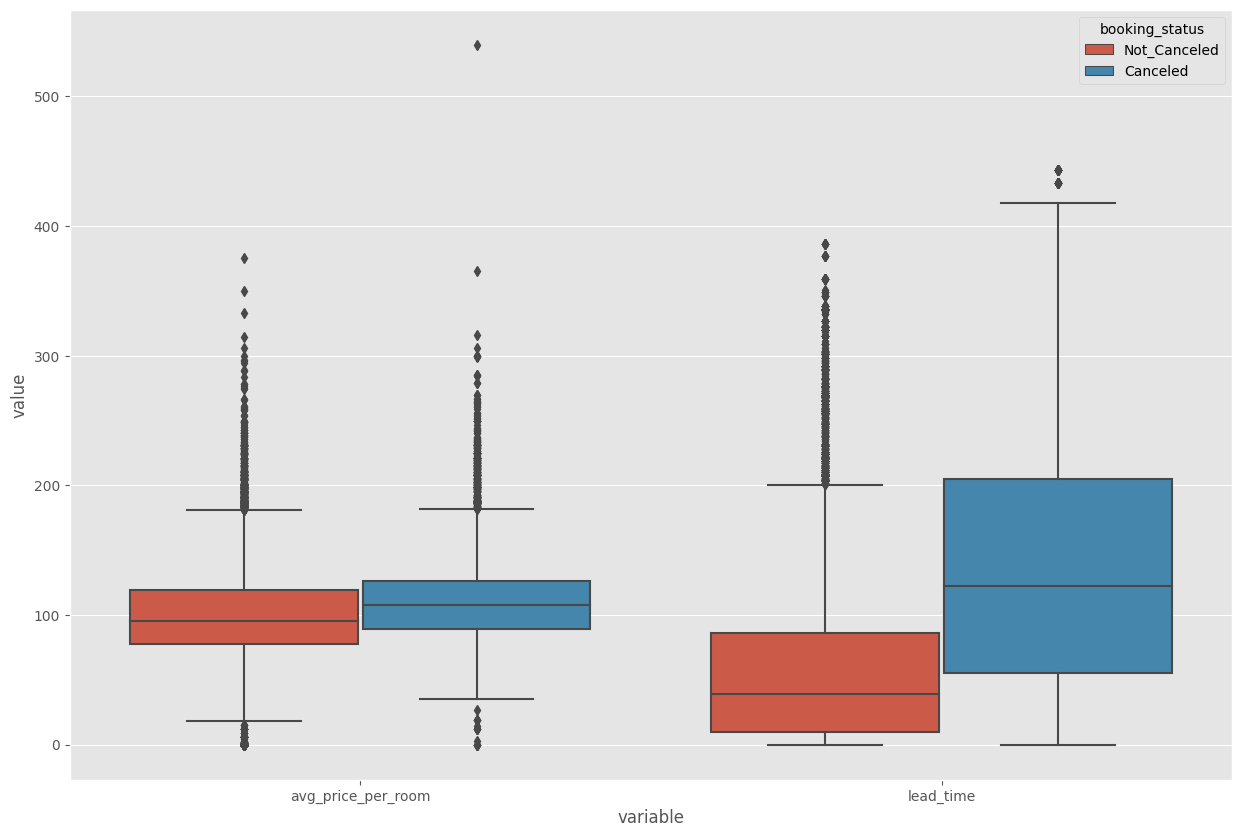

In [38]:
melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['avg_price_per_room', 'lead_time'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
plt.show()

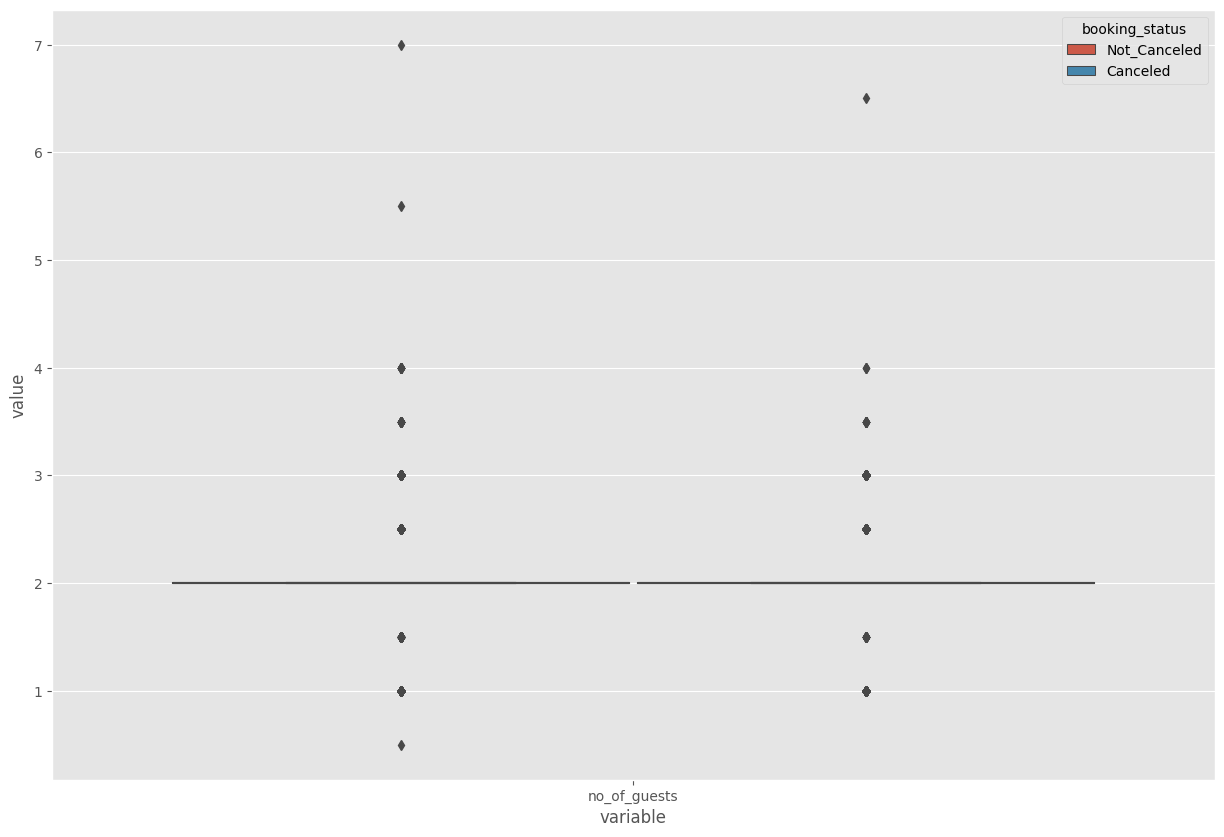

In [39]:
melted_data = pd.melt(data_new,id_vars = "booking_status",value_vars = ['no_of_guests'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="booking_status",data= melted_data)
plt.show()